In [162]:
import pandas as pd 

In [163]:
credit_dataset = pd.read_csv("creditcard.csv")

In [164]:
# menampilkan dataset
credit_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [165]:
#memeriksa nilai yang hilang
total= credit_dataset.isnull().sum().sort_values(ascending = False)
percent = (credit_dataset.isnull().sum()/credit_dataset.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


menemukan bahwa dataset yang telah di proses sebelumnya tidak memiliki nilai yang hilang

In [167]:
#menghitung jumlah transaksi di kelas 0 (nol/tidak ada penipuan) dan kelas 1 (penipuan)
import plotly.graph_objects as go
my_tab= pd.crosstab(index=credit_dataset["Class"],columns="count")
print(my_tab)

col_0   count
Class        
0      284315
1         492


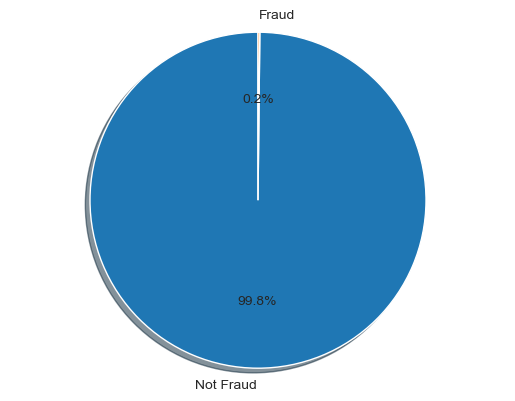

In [168]:
#Membuat diagram Pie untuk menampilkan transaksi kredit fraud dan non-fraud
import matplotlib.pyplot as plt 

labels = 'Not Fraud', 'Fraud'
sizes = [my_tab["count"][0], my_tab["count"][1]]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', 
       shadow=True, startangle=90)
ax1.axis('equal') # Rasio aspek yang sama memastikan bahwa diagram lingkaran digambar sebagai lingkaran.

plt.show()

Hanya 492 (atau 0,2%) transaksi yang curang. Itu berarti data sangat tidak seimbang sehubungan dengan variabel target Class.

# Eksplorasi Data

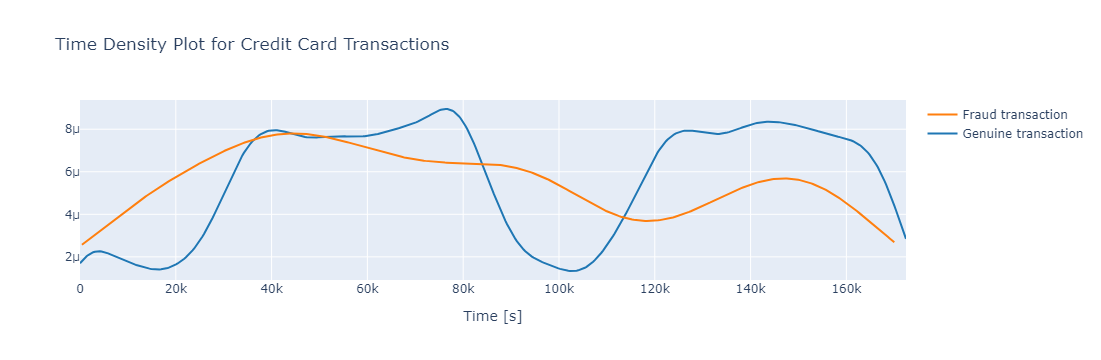

In [171]:
# Merencanakan kepadatan waktu untuk set data transaksi Kartu Kredit
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
Genuine_transaction = credit_dataset.loc[credit_dataset['Class'] == 0]["Time"]
fraud_transaction = credit_dataset.loc[credit_dataset['Class'] == 1]["Time"]
hist_data = [Genuine_transaction, fraud_transaction]
group_labels = ['Genuine transaction', 'Fraud transaction']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Time Density Plot for Credit Card Transactions', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

C:\Users\HP\AppData\Local\Temp\ipykernel_13844\3566703318.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\AppData\Local\Temp\ipykernel_13844\3566703318.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your

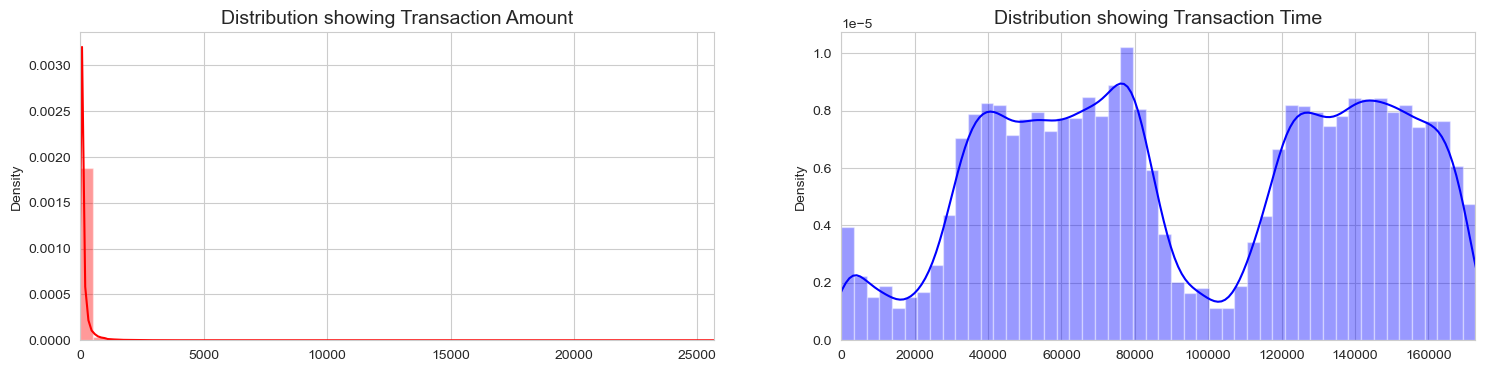

In [172]:
#Distribusi Jumlah Transaksi Vs Waktu Transaksi
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = credit_dataset['Amount'].values
time_val = credit_dataset['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution showing Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution showing Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [173]:
genuine_transaction = credit_dataset.loc[credit_dataset['Class'] == 0]["Amount"]
fraud_transaction = credit_dataset.loc[credit_dataset['Class'] == 1]["Amount"]
genuine_transaction.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [174]:
fraud_transaction.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Jumlah Transaksi

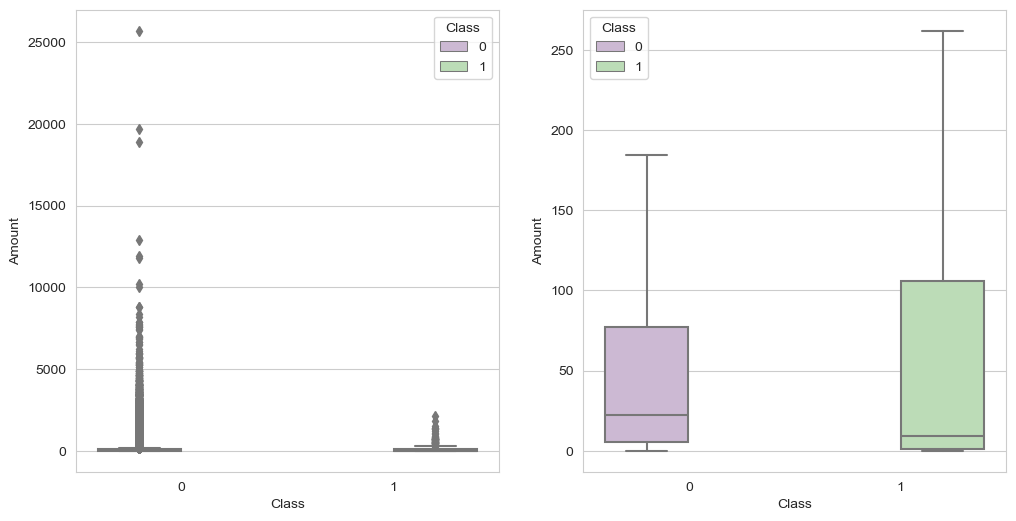

In [176]:
#BOXPLOT untuk menampilkan penipuan dan transaksi asli
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=credit_dataset, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=credit_dataset, palette="PRGn",showfliers=False)
plt.show();

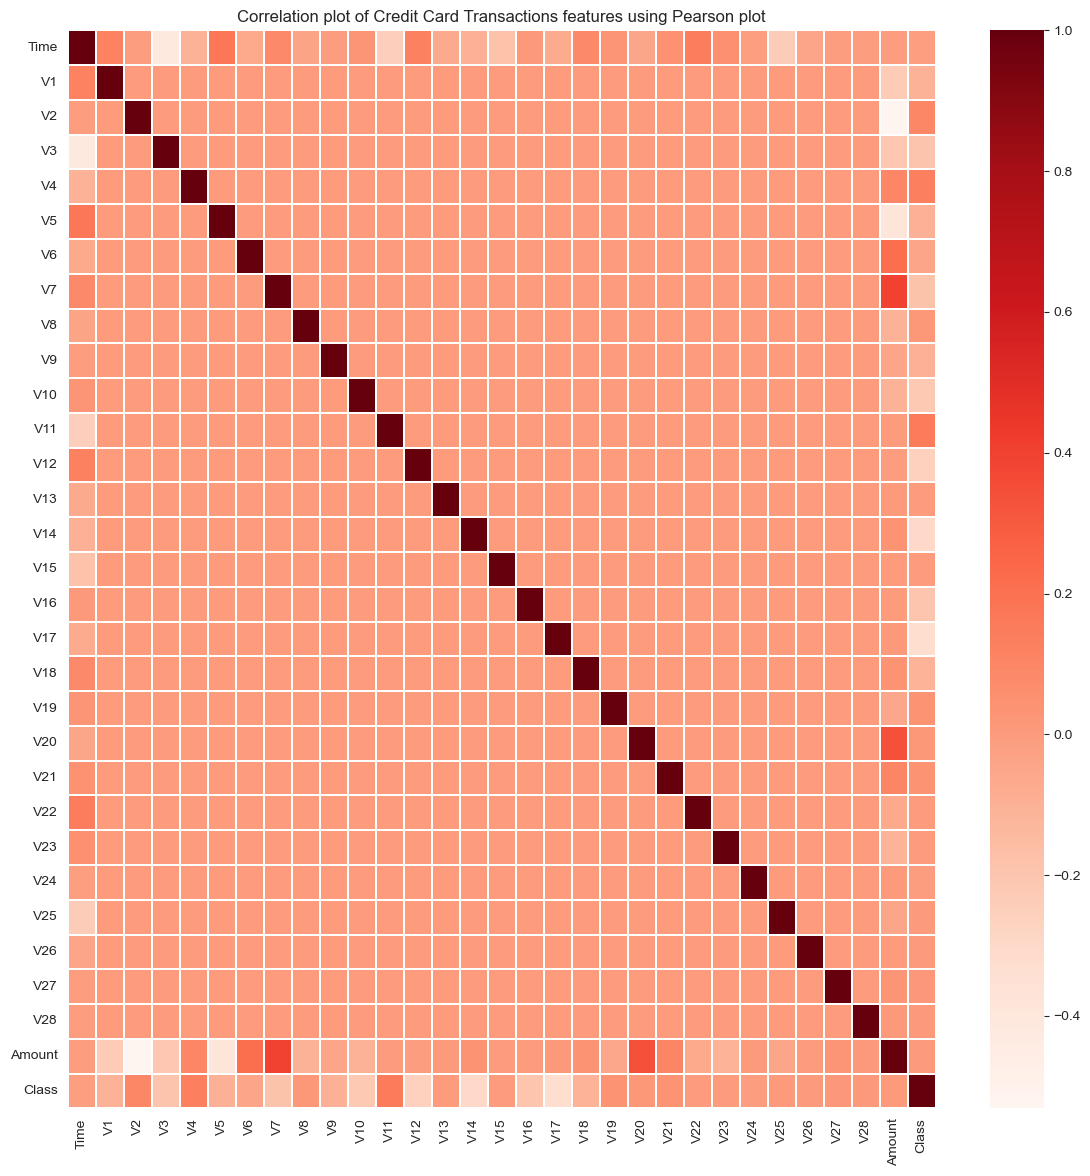

In [177]:
#Memplot korelasi Fitur
plt.figure(figsize = (14,14))
plt.title('Correlation plot of Credit Card Transactions features using Pearson plot')
corr = credit_dataset.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

Seperti yang diharapkan, tidak ada korelasi yang menonjol antara fitur V1-V28. Terdapat korelasi tertentu antara beberapa fitur ini dengan Waktu (korelasi terbalik dengan V3) dan Jumlah (korelasi langsung dengan V7 dan V20, korelasi terbalik dengan V1 dan V5).

Mari kita plot nilai yang berkorelasi dan berkorelasi terbalik pada grafik yang sama.

Mari kita mulai dengan nilai yang berkorelasi langsung: {V20; Jumlah} dan {V7; Jumlah}.

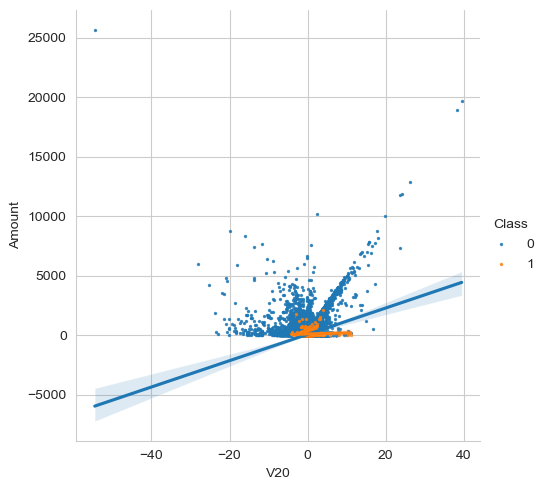

In [179]:
#Merencanakan Implot untuk menunjukkan regresi linier antara fitur V20 dan Kelas transaksi
s = sns.lmplot(x='V20', y='Amount',data=credit_dataset, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

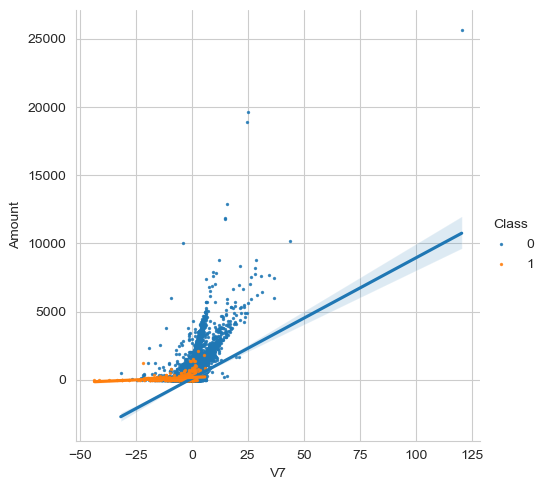

In [180]:
#Plotting an Implot to show the linear regression between feature V7 and Class of transactions
s = sns.lmplot(x='V7', y='Amount',data=credit_dataset, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

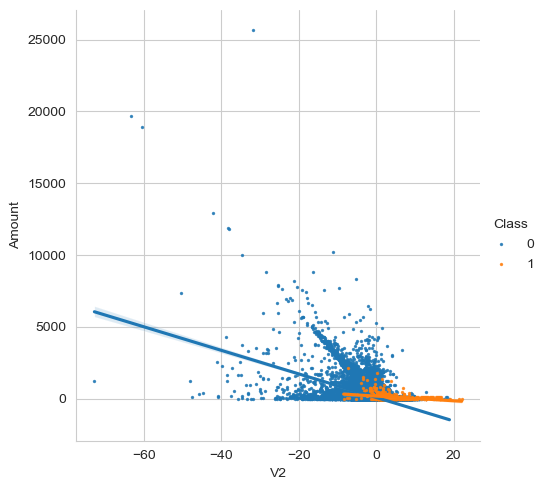

In [181]:
#Plotting an Implot to show the linear regression between feature V2 and Class of transactions
s = sns.lmplot(x='V2', y='Amount',data=credit_dataset, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

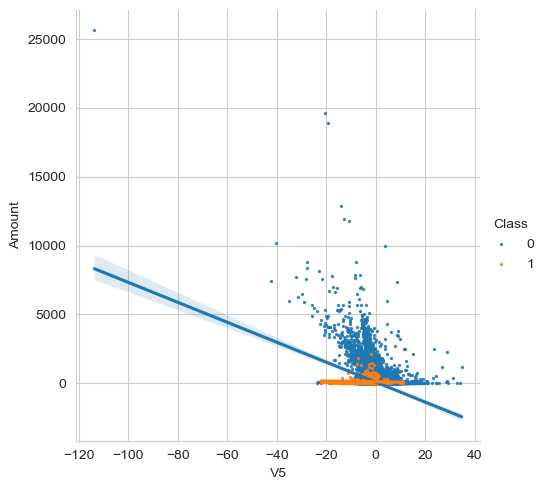

In [182]:
#Plotting an Implot to show the linear regression between feature V5 and Class of transactions
s = sns.lmplot(x='V5', y='Amount',data=credit_dataset, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show

We can confirm that the two couples of features are inverse correlated (the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope).

C:\Users\HP\AppData\Local\Temp\ipykernel_13844\4225076457.py:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\AppData\Local\Temp\ipykernel_13844\4225076457.py:16: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before oper

<Figure size 640x480 with 0 Axes>

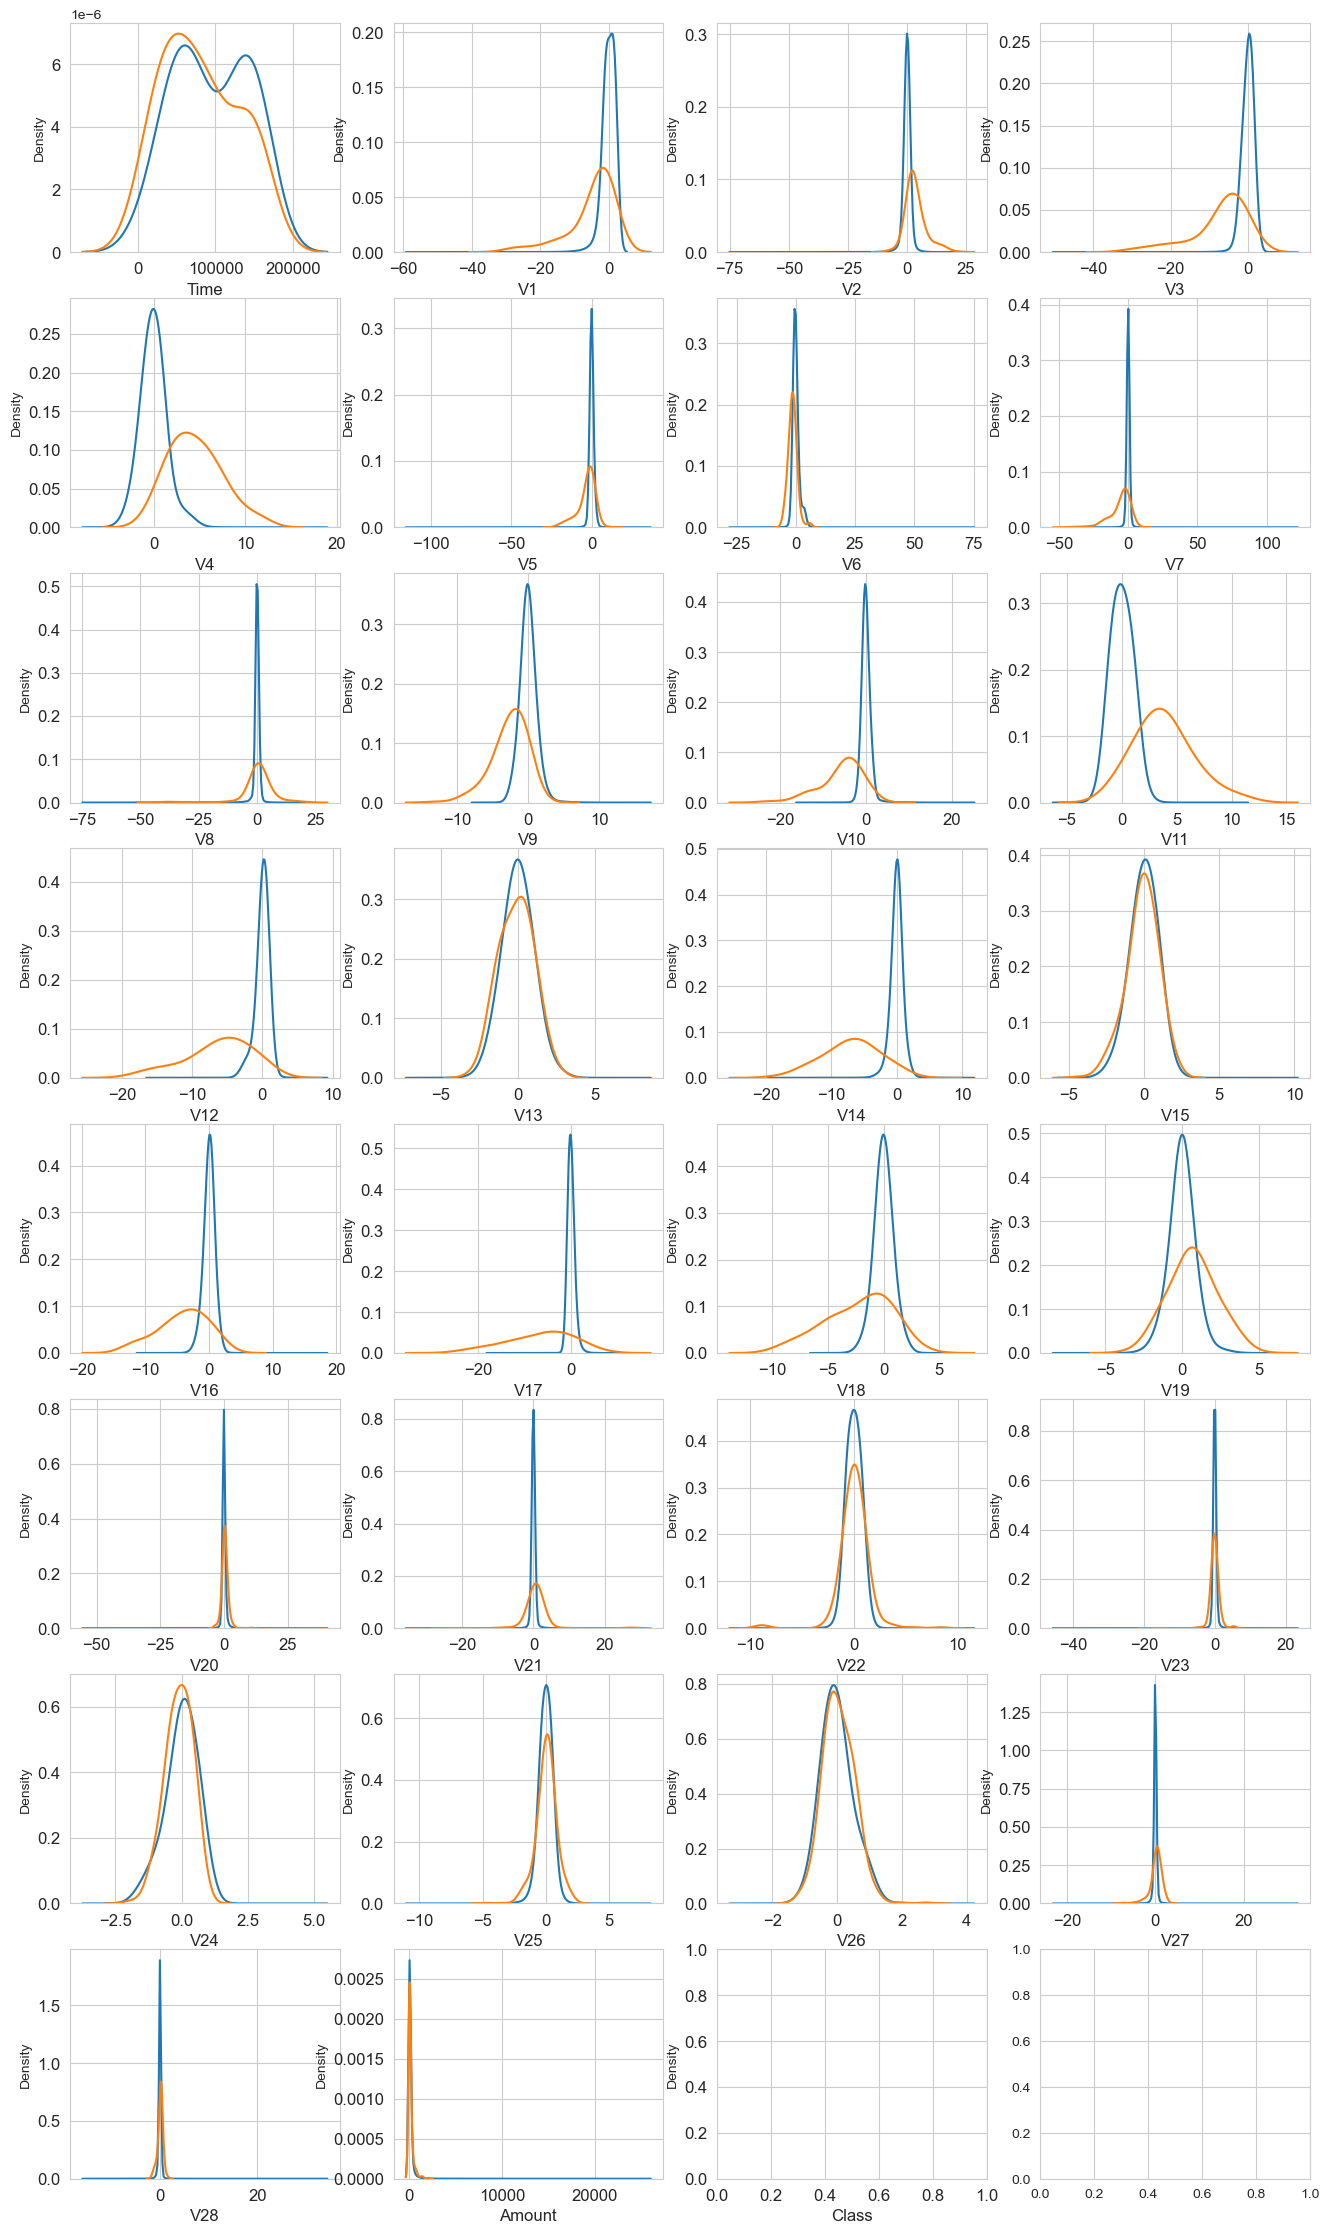

In [184]:
#Plotting feature density visualization
val = credit_dataset.columns.values

i = 0
genuine = credit_dataset.loc[credit_dataset['Class'] == 0]
fraud = credit_dataset.loc[credit_dataset['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in val:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(genuine[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(fraud[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();